<a href="https://colab.research.google.com/github/Ahmad-abdulrahim/Diabetes-Classification-using-Logistic-Regression/blob/main/Logistic_Regression_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

In [331]:
import pandas as pd

sugar = pd.read_csv('/content/diabetes.csv')

# EDA

In [332]:
sugar.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [333]:
sugar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [334]:
sugar.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Preprocessing

In [335]:
# these columns are not supposed to be 0
sugar['Glucose'] = sugar['Glucose'].replace(0, (sugar['Glucose'].mean()))
sugar['BloodPressure'] = sugar['BloodPressure'].replace(0, (sugar['BloodPressure'].mean()))
sugar['SkinThickness'] = sugar['SkinThickness'].replace(0, (sugar['SkinThickness'].mean()))
sugar['Insulin'] = sugar['Insulin'].replace(0, (sugar['Insulin'].mean()))
sugar['BMI'] = sugar['BMI'].replace(0, (sugar['BMI'].mean()))

In [336]:
sugar['Glucose'].mean()

121.68160502115886

In [337]:
sugar['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: >

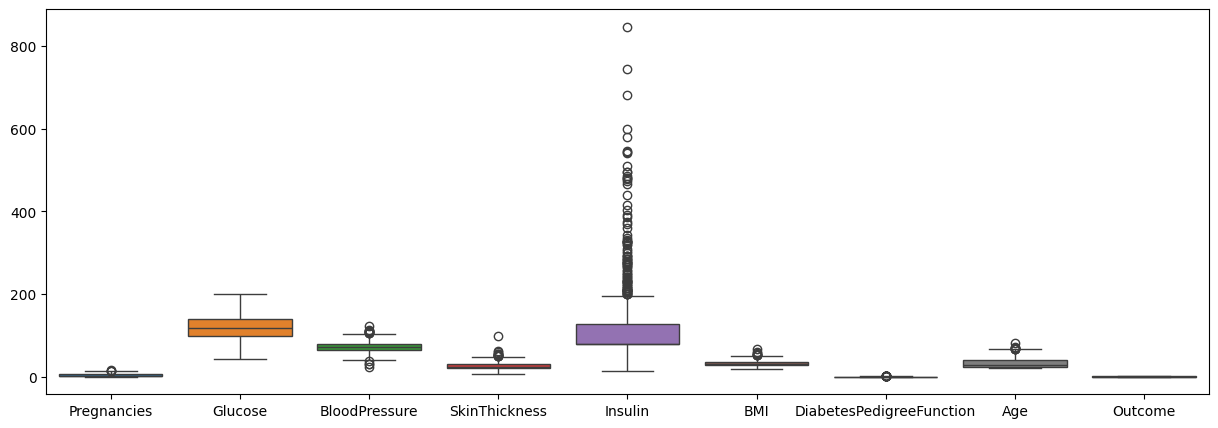

In [338]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=sugar, ax=ax)

# Logistic Regression

In [339]:
X = sugar.drop(columns=['Outcome'])
y = sugar['Outcome']

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [341]:
scale = StandardScaler()

In [342]:
X_train_sc = scale.fit_transform(X_train)
X_test_sc = scale.transform(X_test)

In [343]:
clf = LogisticRegression()

In [344]:
clf.fit(X_train_sc, y_train)

LogisticRegression()

In [345]:
y_pred = clf.predict(X_test_sc)
print(y_pred)

[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [346]:
clf.predict_proba(X_test_sc)

array([[0.74085216, 0.25914784],
       [0.8272927 , 0.1727073 ],
       [0.89038968, 0.10961032],
       [0.84852405, 0.15147595],
       [0.53605745, 0.46394255],
       [0.58071201, 0.41928799],
       [0.98634383, 0.01365617],
       [0.59225165, 0.40774835],
       [0.42899498, 0.57100502],
       [0.22818685, 0.77181315],
       [0.77335102, 0.22664898],
       [0.10157941, 0.89842059],
       [0.64262596, 0.35737404],
       [0.70792494, 0.29207506],
       [0.92133815, 0.07866185],
       [0.61275053, 0.38724947],
       [0.88416717, 0.11583283],
       [0.92906588, 0.07093412],
       [0.25599993, 0.74400007],
       [0.40496577, 0.59503423],
       [0.81355128, 0.18644872],
       [0.92765719, 0.07234281],
       [0.50945271, 0.49054729],
       [0.90698682, 0.09301318],
       [0.44496951, 0.55503049],
       [0.10612143, 0.89387857],
       [0.89077844, 0.10922156],
       [0.97090681, 0.02909319],
       [0.74571181, 0.25428819],
       [0.89181393, 0.10818607],
       [0.

In [347]:
print('Metrics for Logistic Regression \n')
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print("\n=====================================================================\n")
print('Classification report:')
print(classification_report(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print("\n=====================================================================\n")
y_prob = clf.predict_proba(X_test_sc)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

Metrics for Logistic Regression 

Accuracy score: 0.7662337662337663
Precision score: 0.6862745098039216
Recall score: 0.6363636363636364
F1 score: 0.660377358490566


Classification report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Confusion matrix:
[[83 16]
 [20 35]]


ROC AUC Score: 0.822038567493113


# SMOTE Technique

In [348]:
# SMOTE Technique for synthesizing data
from imblearn.over_sampling import SMOTE

In [349]:
smote=SMOTE(random_state=2)

In [350]:
X.shape, y.shape

((768, 8), (768,))

In [351]:
X_sm, y_sm = smote.fit_resample(X, y)

In [352]:
X_sm.shape, y_sm.shape

((1000, 8), (1000,))

In [353]:
y_sm.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

In [355]:
X_train_sc = scale.fit_transform(X_train)
X_test_sc = scale.transform(X_test)

In [356]:
clf_smote = LogisticRegression()

In [357]:
clf_smote.fit(X_train_sc, y_train)

LogisticRegression()

In [358]:
y_pred = clf_smote.predict(X_test_sc)
print(y_pred)

[0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0
 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0
 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0
 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1]


In [359]:
proba_df = pd.DataFrame(clf_smote.predict_proba(X_test_sc), columns=clf_smote.classes_)
proba_df.head()

,0,1
0,0.637375,0.362625
1,0.838521,0.161479
2,0.124725,0.875275
3,0.140243,0.859757
4,0.737317,0.262683


In [360]:
print('Metrics for Logistic Regression with SMOTE\n')
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print("\n=====================================================================\n")
print('Classification report:')
print(classification_report(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print("\n=====================================================================\n")
y_prob = clf_smote.predict_proba(X_test_sc)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

Metrics for Logistic Regression with SMOTE

Accuracy score: 0.768
Precision score: 0.7575757575757576
Recall score: 0.7936507936507936
F1 score: 0.7751937984496123


Classification report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       124
           1       0.76      0.79      0.78       126

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250

Confusion matrix:
[[ 92  32]
 [ 26 100]]


ROC AUC Score: 0.8438940092165899


After employing SMOTE (Synthetic Minority Over-sampling Technique) to correct the imbalance in our diabetes dataset, we observed a improvement in the model's performance metrics. The precision score improved from 0.686 to 0.758, suggesting that the model's ability to correctly identify positive cases significantly increased, which is crucial in medical diagnoses. The recall score saw a substantial rise from 0.636 to 0.794, indicating a marked improvement in the model's capability to detect true positive cases, essential for conditions requiring early intervention. The F1 score, balancing precision and recall, improved from 0.660 to 0.775.

# Hypertuning Logistic Regression model

In [361]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define a pipeline that includes scaling and the model
pipeline = Pipeline([
    ('scaler', scale),
    ('clf_hypertune', LogisticRegression(solver='liblinear'))
])

# Define the parameter grid
param_grid = {
    'clf_hypertune__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf_hypertune__penalty': ['l1', 'l2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters: ", grid_search.best_params_)
# Best model
best_model = grid_search.best_estimator_

Best parameters:  {'clf_hypertune__C': 10, 'clf_hypertune__penalty': 'l2'}


In [362]:
clf_hypertune = LogisticRegression(solver='liblinear', C=10, penalty='l2')

In [363]:
clf_hypertune.fit(X_train_sc, y_train)

LogisticRegression(C=10, solver='liblinear')

In [364]:
y_pred = clf_hypertune.predict(X_test_sc)
print(y_pred)

[0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0
 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0
 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0
 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1]


In [365]:
print('Metrics of Model with Hypertuning \n')
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print("\n=====================================================================\n")
print('Classification report:')
print(classification_report(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print("\n=====================================================================\n")
y_prob = clf_hypertune.predict_proba(X_test_sc)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

Metrics of Model with Hypertuning 

Accuracy score: 0.768
Precision score: 0.7575757575757576
Recall score: 0.7936507936507936
F1 score: 0.7751937984496123


Classification report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       124
           1       0.76      0.79      0.78       126

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250

Confusion matrix:
[[ 92  32]
 [ 26 100]]


ROC AUC Score: 0.843958013312852


# Feature Selection with correlation analysis

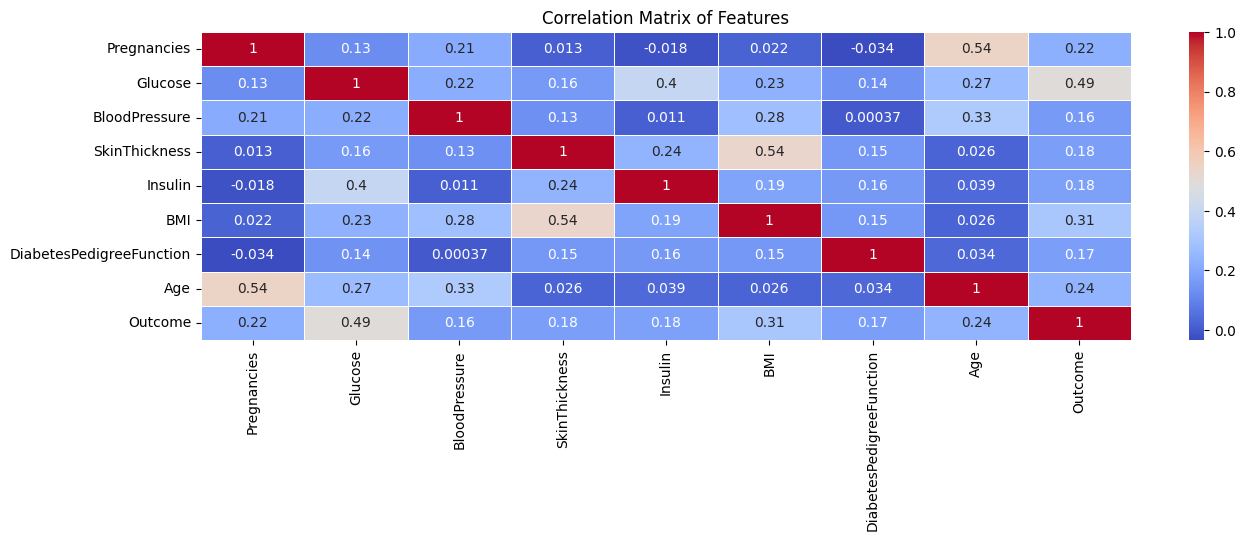

In [366]:
correlation_matrix = sugar.corr()

plt.figure(figsize=(15, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [367]:
coefficients = clf_hypertune.coef_[0]
features = X_train.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
1,Glucose,1.296293
5,BMI,0.689505
0,Pregnancies,0.431326
6,DiabetesPedigreeFunction,0.254218
7,Age,0.200980
3,SkinThickness,0.014823
2,BloodPressure,-0.260977
4,Insulin,-0.325240


In [368]:
# Selecting features that have a high coefficient value
X_sm_fs = X_sm[['Pregnancies', 'Glucose', 'DiabetesPedigreeFunction', 'Insulin', 'BMI', 'BloodPressure']]

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X_sm_fs, y_sm, test_size=0.25, random_state=42)

In [370]:
scaler_fs = StandardScaler()
X_train_sc = scaler_fs.fit_transform(X_train)
X_test_sc = scaler_fs.transform(X_test)

In [371]:
clf_fs = LogisticRegression(solver='liblinear', C=10, penalty='l2')

In [372]:
clf_fs.fit(X_train_sc, y_train)

LogisticRegression(C=10, solver='liblinear')

In [373]:
y_pred = clf_fs.predict(X_test_sc)
print(y_pred)

[0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0
 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0
 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1]


In [374]:
print('Metrics after feature selection of high correlated features \n')
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print("\n=====================================================================\n")
print('Classification report:')
print(classification_report(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print("\n=====================================================================\n")
y_prob = clf_fs.predict_proba(X_test_sc)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

Metrics after feature selection of high correlated features 

Accuracy score: 0.764
Precision score: 0.7518796992481203
Recall score: 0.7936507936507936
F1 score: 0.7722007722007722


Classification report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       124
           1       0.75      0.79      0.77       126

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250

Confusion matrix:
[[ 91  33]
 [ 26 100]]


ROC AUC Score: 0.8446620583717358


# Training with Polynomial Features

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)
scaler_poly = StandardScaler()
X_train_sc = scaler_poly.fit_transform(X_train)
X_test_sc = scaler_poly.transform(X_test)

In [376]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomial features generates a new feature matrix consisting of all polynomial combinations of the feature
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train_sc)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X_train.columns))
X_poly.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies^2,Pregnancies Glucose,...,Insulin^2,Insulin BMI,Insulin DiabetesPedigreeFunction,Insulin Age,BMI^2,BMI DiabetesPedigreeFunction,BMI Age,DiabetesPedigreeFunction^2,DiabetesPedigreeFunction Age,Age^2
0,0.936878,-1.382174,0.447617,-0.101807,-0.527282,-0.539516,0.864491,0.209158,0.877740,-1.294929,...,0.278026,0.284477,-0.455831,-0.110285,0.291078,-0.466407,-0.112844,0.747345,0.180815,0.043747
1,-0.882695,1.635137,-0.585393,1.146628,0.612559,0.412753,0.795005,-0.583552,0.779151,-1.443327,...,0.375228,0.252835,0.486987,-0.357460,0.170365,0.328140,-0.240863,0.632032,-0.463927,0.340533
2,0.936878,-0.133838,-0.131494,-0.685358,-0.429556,-0.599282,-0.488466,-0.407394,0.877740,-0.125390,...,0.184519,0.257426,0.209824,0.174999,0.359139,0.292729,0.244144,0.238599,0.198998,0.165970
3,-0.882695,-0.406761,-0.685336,0.828717,-0.429556,0.098245,0.098538,-1.112026,0.779151,0.359046,...,0.184519,-0.042202,-0.042328,0.477678,0.009652,0.009681,-0.109251,0.009710,-0.109577,1.236601
4,-0.276171,-1.414751,-0.227554,-0.685358,-0.429556,-1.789179,-0.322485,-0.759710,0.076270,0.390713,...,0.184519,0.768553,0.138525,0.326338,3.201160,0.576983,1.359257,0.103996,0.244995,0.577159


In [377]:
clf_poly = LogisticRegression(solver='liblinear', C=10, penalty='l2')
clf_poly.fit(X_train_sc, y_train)
y_pred = clf_poly.predict(X_test_sc)

In [378]:
print('Metrics of Training with Polynomial Features: \n')
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print("\n=====================================================================\n")
print('Classification report:')
print(classification_report(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print("\n=====================================================================\n")
y_prob = clf_poly.predict_proba(X_test_sc)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

Metrics of Training with Polynomial Features: 

Accuracy score: 0.768
Precision score: 0.7575757575757576
Recall score: 0.7936507936507936
F1 score: 0.7751937984496123


Classification report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       124
           1       0.76      0.79      0.78       126

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250

Confusion matrix:
[[ 92  32]
 [ 26 100]]


ROC AUC Score: 0.843958013312852


# Evaluation

In [380]:
data = {"Step": ["Initial Logistic Regression", "Logistic Regression with SMOTE", "Model with Hyperparameter Tuning", "After Feature Selection", "Training with Polynomial Features"], "Accuracy": [0.766, 0.768, 0.768, 0.764, 0.768], "Precision": [0.686, 0.758, 0.758, 0.752, 0.758], "Recall": [0.636, 0.794, 0.794, 0.794, 0.794], "F1-Score": [0.660, 0.775, 0.775, 0.772, 0.775], "ROC AUC": [0.822, 0.844, 0.844, 0.845, 0.844]}
df_results = pd.DataFrame(data)
df_results

,Step,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Initial Logistic Regression,0.766,0.686,0.636,0.660,0.822
1,Logistic Regression with SMOTE,0.768,0.758,0.794,0.775,0.844
2,Model with Hyperparameter Tuning,0.768,0.758,0.794,0.775,0.844
3,After Feature Selection,0.764,0.752,0.794,0.772,0.845
4,Training with Polynomial Features,0.768,0.758,0.794,0.775,0.844


1. Implementing SMOTE to address class imbalance improved recall and F1 scores, indicating better performance in identifying positive cases. The slight increase in ROC AUC to 0.844 demonstrates enhanced model sensitivity and specificity.

2. Hyperparameter tuning maintained the model's performance metrics, suggesting that the adjustments were effective in optimizing the model without overfitting or underfitting, as indicated by consistent accuracy, precision, recall, and a similar ROC AUC score.

3. Feature selection based on high correlation slightly reduced the accuracy and precision but maintained recall and F1 scores. This indicates that reducing the feature set to highly correlated features marginally impacted the model's ability to distinguish between classes, as shown by the ROC AUC score of 0.845, which is slightly higher, suggesting a marginal improvement in model discrimination.

4. Training with polynomial features did not significantly alter the model's performance metrics compared to hyperparameter tuning, indicating that adding polynomial features did not provide additional benefits in this context. The ROC AUC score remained similar, suggesting the model's discrimination ability was maintained.